<a href="https://colab.research.google.com/github/VGuerrero07/Data_Science/blob/master/COVID_19_no_Brasil_Estudo_de_Caso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 no Brasil: Estudo de Caso

Sem dúvidas, podemos dizer que a COVID-19 é uma **doença que marcou gerações**.

Começando na China e se espalhando para diversos lugares no mundo, foi considerada uma **pandemia** pela Organização Mundial da Saúde (OMS) no dia 11 de março de 2020.

<img alt="Coronavirus" width="35%" src="https://www.copihel.com.br/media/catalog/product/cache/1/image/600x600/9df78eab33525d08d6e5fb8d27136e95/b/r/brasil.jpg">

Já é possível observar diversos impactos da doença e das ações tomadas, sejam econômicos, sanitários, ou sociais, embora ainda existam outras várias consequências que serão apenas sentidas com o passar do tempo.

Este projeto possui o objetivo de fazer uma análise dos dados públicos da COVID-19 no Brasil, considerando número de casos e número de mortes, e realizar algumas comparações com outros países.

## A doença

De acordo com o Ministério da Saúde do Brasil, a COVID-19 é **uma doença causada pelo coronavírus SARS-CoV-2**, que apresenta um quadro clínico que varia de infecções assintomáticas a quadros respiratórios graves. Os principais sintomas são muito similares aos da gripe comum: tosse, febre e coriza, por exemplo. 

<img alt="image" width="50%" src="https://difusora890.com.br/wp-content/uploads/2020/06/coronavirusbe.jpg">

De acordo com o órgão, cerca de **80% dos pacientes com COVID-19 podem ser assintomáticos**, e cerca de **20% dos casos podem requerer atendimento hospitalar** por apresentarem dificuldade respiratória. Destes casos, aproximadamente 5% podem necessitar de suporte para o tratamento de insuficiência respiratória (suporte ventilatório).

Esta doença ganhou muita importância por sua alta rapidez de infecção, de tal forma que muitas novas infecções podem surgir em um curtíssimo intervalo de tempo, o que pode causar uma sobrecarga no setor de saúde.

## Our World in Data

A origem dos dados que serão usados neste projeto é o site "Our World in Data", uma organização internacional que possui diversos conjuntos de dados, de diversos problemas que a humanidade enfrenta nos dias atuais: pobreza, fome, guerras, dentre outros.

Neste período de pandemia, o site disponibilizou publicamente um conjunto de dados bastante completo do panorama da VOID-19 em diversos países, e este *dataset* que foi escolhido para este projeto.

## Estudo de Caso

Neste projeto, o objetivo será mostrar alguns dados da pandemia de COVID-19 no Brasil, analisando sua evolução com o passar do tempo, e uma comparação com outros países.

Iremos passar por 4 grandes etapas neste projeto:

*   Obtenção dos Dados
*   Análise do *dataset*
*   Análise dos Dados
*   Conclusão

A ideia é realizar uma análise estatística breve, e não está no escopo a aplicação de modelos de predição ou *Machine Learning*. 

### Obtenção dos dados

O *dataset* utilizado será o disponibilizado pela "Our World in Data", disponível [neste link](https://covid.ourworldindata.org/data/owid-covid-data.csv).

É importante dizer que os dados apresentados, embora vindo de fontes oficiais de diversos países, **podem conter diversos problemas em sua coleta** (seja subnotificação, sobrenotificação, viéses, dentre outros); mesmo assim, ainda devemos analisar os dados que temos exatamente porque é **apenas com análise estatística assertiva que afirmações podem ser feitas de maneira concreta**. 

No *dataset*, teremos dados além dos dados de pandemi (número de casos, mortes, etc.), como de idade média e tamanho da população.

Primeiramente, devemos importar as bibliotecas que usaremos neste projeto (`pandas`, `matplotlib`, `seaborn`, etc.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime as dt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Agora, vamos importar os dados da pandemia da COVID-19.

In [2]:
# importando os dados em csv
df=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

#### Dicionário de Variáveis

Abaixo, listo a descrição de cada uma das variáveis do conjunto de dados. Para mais informações, [neste site](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md) há a explicação detalhada de cada uma das colunas, feita pelo próprio "Our World in Data".

* `iso_code` - Nome dos países em código, conforme ISO 3166;
* `continent` - Continende onde se encontra o país;
* `location` - A localização (país, por ex.) da coleta dos dados;
* `date` - A data observada;
* `total_cases` - O número tota de casos na data;
* `new_cases` - O número de novos casos registrados;
* `total_deaths` - O número total de mortes por COVID-19;
* `new_deaths` - O número de novas mortes por COVID-19;
* `total_cases_per_million` - O número de casos totais por milhão de habitantes;
* `new_cases_per_million` - Novos casos por milhão de habitantes;
* `total_deaths_per_million` - número total de mortes por milhão de habitantes;
* `new_deaths_per_million`- número de novas mortes por milhão de habitantes;
* `total_tests` - número total de testes;
* `new_tests` - número de novos testes;
* `new_tests_smoothed` - número de novos testes, com tratamento para 7 dias;
* `total_tests_per_thousand` - número de testes por mil habitantes;
* `new_tests_per_thousand` - novos testes por mil habitantes;
* `new_tests_smoothed_per_thousand` - novos testes por mil habitantes, com tratamento de 7 dias;
* `tests_units` - unidades de testes usadas pelo país;
* `stringency_index` - "índice de rigidez", média ponderada baseada em indicadores como "fechamento de escolas", "fechamento de empresas", etc.
* `population`- população do país
* `population_density`- densidade populacional (habitantes/km²)
* `median_age` - idade média da população;
* `aged_65_older` - parte da população com mais de 65 anos;
* `aged_70_older` - parte da popoulação com mais de 70 anos;
* `gdp_per_capita` - PIB *per capita* do país;
* `extreme_poverty` - parte da população em extrema pobreza;
* `cvd_death_rate` - taxa de mortes cardiovasculares em 2017;
* `diabetes_prevalence` - % da população entre 20 e 79 anos com diabetes, em 2017;
* `female_smokers` - parte da população que é fumante do sexo feminino;
* `male_smokers` - parte da população que é fumante do sexo masculino; 
* `handwashing_facilities` - parte da população com instalações básicas de higiene;
* `hospital_beds_per_thousand` - número de leitos por mil habitantes;
* `life_expectancy` - expectativa de vida ao nascer, em 2019


### Análise do Dataset

Primeiramente, vamos analisar o nosso conjunto de dados.

A análise do *dataset* é muito importante para um projeto de Data Science, uma vez que ela nos permite entender como estão os dados, se temos outliers, quais são os tipos dos dados, etc.

A primeira coisa é verificar a quantidade de linhas (entradas) e a quantidade de colunas variáveis) que temos em nosso *dataset*:

In [3]:
print('O número de linhas do dataset é {}\nO número de colunas é {}.'.format(df.shape[0], df.shape[1]))

#verificando as 5 primeiras entradas
df.head()

O número de linhas do dataset é 26959
O número de colunas é 34.


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [4]:
# extraindo a quantidade de países considerados
print('Quantidade de localidades no dataset: {}\n'.format(df.location.unique().shape[0]))
df.location.unique()

Quantidade de localidades no dataset: 212



array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

Temos um total de 212 localidades, sendo que duas delas ão "International" e "World". Devemos retirar estes dois valores para não atrapalharem a análise estatística dos dados, uma vez que estes dois valores não representam países. Para isso, criaremos um novo Dataframe, para não perdermos o inicial.


In [5]:
dfcountry = df[(df.location != 'World') & (df.location != 'International')]
print('Quantidade de localidades no dataset: {}\n'.format(dfcountry.location.unique().shape[0]))
dfcountry.location.unique()

Quantidade de localidades no dataset: 210



array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

Agora, o que vamos analisar são os valores ausentes. Os valores ausentes são muito importantes porque eles influenciam e distorcem a análise estatística dos dados, e impedem uma conclusão mais assertiva.

In [6]:
# analisando os valores ausentes

round((dfcountry.isnull().sum()/dfcountry.shape[0]).sort_values(ascending=False),2)

new_tests                          0.74
new_tests_per_thousand             0.74
total_tests_per_thousand           0.71
total_tests                        0.71
new_tests_smoothed_per_thousand    0.69
new_tests_smoothed                 0.69
tests_units                        0.67
handwashing_facilities             0.60
extreme_poverty                    0.40
male_smokers                       0.28
female_smokers                     0.28
stringency_index                   0.20
hospital_beds_per_thousand         0.17
aged_65_older                      0.11
gdp_per_capita                     0.11
aged_70_older                      0.10
median_age                         0.10
cvd_death_rate                     0.09
diabetes_prevalence                0.06
population_density                 0.04
life_expectancy                    0.01
new_deaths_per_million             0.01
total_deaths_per_million           0.01
new_cases_per_million              0.01
total_cases_per_million            0.01


Vemos que há algumas colunas que possuem muitos valores ausentes: por exemplo, a coluna `new_tests` possui 74% de valores ausentes!

Os dados relacionados a testes são os que possuem a maior quantidade de valores nulos. Isto provavelmente se dá porque muitos países não reportam a quantidade de testes novos e totais que já aplicaram na população. 

Fora isso, temos que as estatísticas envolvendo o panorama dos países frente a estruturas sanitárias (instalações de sanitização de mãos, por exemplo), e alguns dados de características populacionais (fumantes, pobreza, etc) também não estão presentes em muitas linhas de nosso *dataset*.

Já alguns dados relacionados à infecção e mortes pela COVID-19 estão nulos porque o início das infecções se deu em momentos diferentes nos países listados, e por isso a quantidade proporcional é bem baixa.


In [7]:
# Exemplo - Países que não possem dados de densidade populacional
dfcountry.loc[df.population_density.isnull()].location.unique()

array(['Anguilla', 'Bonaire Sint Eustatius and Saba', 'Falkland Islands',
       'Guernsey', 'Jersey', 'Montserrat', 'South Sudan', 'Syria',
       'Taiwan', 'Vatican', 'Western Sahara'], dtype=object)

Agora, vamos analisar o tipo das variáveis que temos dentro do nosso conjunto de dados, através do método `dtypes`.

In [8]:
# extraindo o tipo de cada variável
dfcountry.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Percebemos que a coluna `date` está formatada como objeto; por isso, uma das coisas que devemos fazer é transformá-la para o tipo datetime. Após isso, vamos descobrir qual é o valor máximo de data que temos no conjunto de dados.

In [9]:
# transformando a coluna date para o formato datetime
dfcountry.date = pd.to_datetime(df.date, format='%Y-%m-%d')

print("A data mais recente é {}".format(dfcountry.date.max().date(),'%Y-%m-%d'))
print("A data mais antiga é {}".format(dfcountry.date.min().date(),'%Y-%m-%d'))

A data mais recente é 2020-06-29
A data mais antiga é 2019-12-31


O conjunto de dados está muito atualizado, uma vez que a última data é 24 de junho de 2020. Isto se deve a sua atualização diária, principalmente pelo excelente trabalho do "Our World in Data".

Agora, temos uma ideia muito maior de como é o nosso DataFrame e nossos dados. Agora, é a hora de analisarmos os dados mais a fundo.


### Análise dos Dados

Nesta seção, vamos tratar dos dados propriamente ditos.

As colunas que usaremos são as relacionadas à doença (infecção e mortes), além da localidade e do continente. Como este projeto não possui objetivo de fazer conclusões preditivas, ou de relacionarmos matematicamentne uma variável com a outra, iremos fazer afirmações sobre a evolução da doença e comparar os dados país a país.

In [10]:
# selecionando as colunas que serão consideradas
df_anlys = dfcountry[['iso_code','continent','location','date','total_cases','new_cases',
       'total_deaths','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million',
       'new_deaths_per_million', 'population']]

# mostrando o tipo das colunas
df_anlys.dtypes

iso_code                            object
continent                           object
location                            object
date                        datetime64[ns]
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
population                         float64
dtype: object

#### Dados Brasileiros

Primeiramente, vamos fazer uma análise rápida dos dados do Brasil: a evolução no número de casos e a evolução do número de mortes decorrentes de COVID-19.

In [11]:
# criação do DataFrame apenas com dados do Brasil
dfbr = df_anlys[df_anlys.iso_code=='BRA']

print(f"Temos {dfbr.shape[0]} linhas e {dfbr.shape[1]} colunas no DataFrame.\n")

# mostrando as 5 últimas entradas deste dataset:
dfbr.tail()

Temos 182 linhas e 13 colunas no DataFrame.



,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population
3652,BRA,South America,Brazil,2020-06-25,1188631.0,42725.0,53830.0,1185.0,5591.994,201.003,253.247,5.575,212559409.0
3653,BRA,South America,Brazil,2020-06-26,1228114.0,39483.0,54971.0,1141.0,5777.745,185.750,258.615,5.368,212559409.0
3654,BRA,South America,Brazil,2020-06-27,1274974.0,46860.0,55961.0,990.0,5998.201,220.456,263.272,4.658,212559409.0
3655,BRA,South America,Brazil,2020-06-28,1313667.0,38693.0,57070.0,1109.0,6180.235,182.034,268.490,5.217,212559409.0
3656,BRA,South America,Brazil,2020-06-29,1344143.0,30476.0,57622.0,552.0,6323.611,143.376,271.087,2.597,212559409.0


Percebemos, infelizmente, que há novos casos e novas mortes no período de 5 dias. Vamos dar uma olhada em como o panorama no Brasil se alterou com o passar do tempo, em um gráfico de linhas:

Número total de casos no dia 29/Jun/2020: 1344143

Número total de mortes no dia 29/Jun/2020: 57622



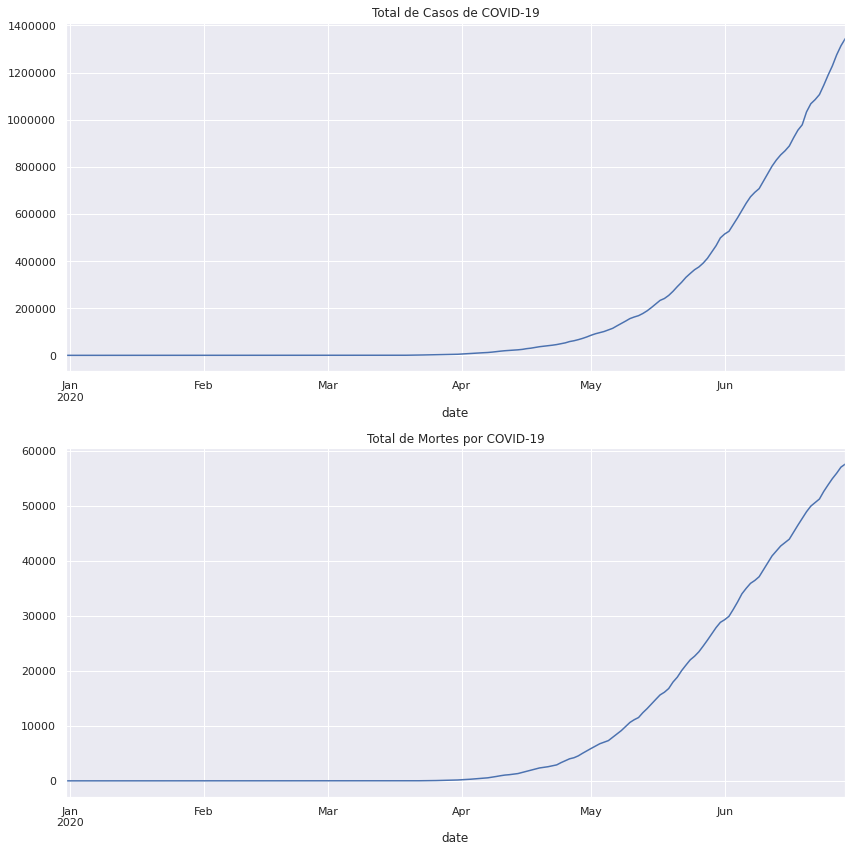

In [12]:
print(f"Número total de casos no dia {dfbr.date.max().date():%d/%b/%Y}: {dfbr.loc[dfbr.date==dfbr.date.max()].total_cases.item():.0f}\n")
print(f"Número total de mortes no dia {dfbr.date.max().date():%d/%b/%Y}: {dfbr.loc[dfbr.date==dfbr.date.max()].total_deaths.item():.0f}\n")
sns.set()
fig, ax = plt.subplots(nrows=2, figsize=(12,12))

dfbr.plot(x="date", y='total_cases', ax=ax[0], title="Total de Casos de COVID-19", legend=False)
dfbr.plot(x="date", y='total_deaths', ax=ax[1], title="Total de Mortes por COVID-19", legend=False)
ax[0].ticklabel_format(axis='y', style='plain')

fig.tight_layout();
plt.show()

O comportamento das duas curvas é bem parecido, com um aumento exponencial em meados de Abril, de tal forma que chegamos no valor de mais de 1 milhão de casos e 52 mil mortes no Brasil.

Contudo, outro dado importante é a evolução do número diário de casos reportados: é através destes valores que podemos afirmar em qual momento estamos dentro da pandemia.

In [13]:
print(f"Número de casos no dia {dfbr.date.max().date():%d/%b/%Y}: {dfbr.loc[dfbr.date==dfbr.date.max()].new_cases.item():.0f}\n")
print(f"Número de mortes no dia {dfbr.date.max().date():%d/%b/%Y}: {dfbr.loc[dfbr.date==dfbr.date.max()].new_deaths.item():.0f}\n")

Número de casos no dia 29/Jun/2020: 30476

Número de mortes no dia 29/Jun/2020: 552



In [14]:
# Criando médias móveis de 7 dias:
dfbr['moving_average_cases'] = dfbr.iloc[:,5].rolling(window=7).mean()
dfbr['moving_average_deaths'] = dfbr.iloc[:,7].rolling(window=7).mean()

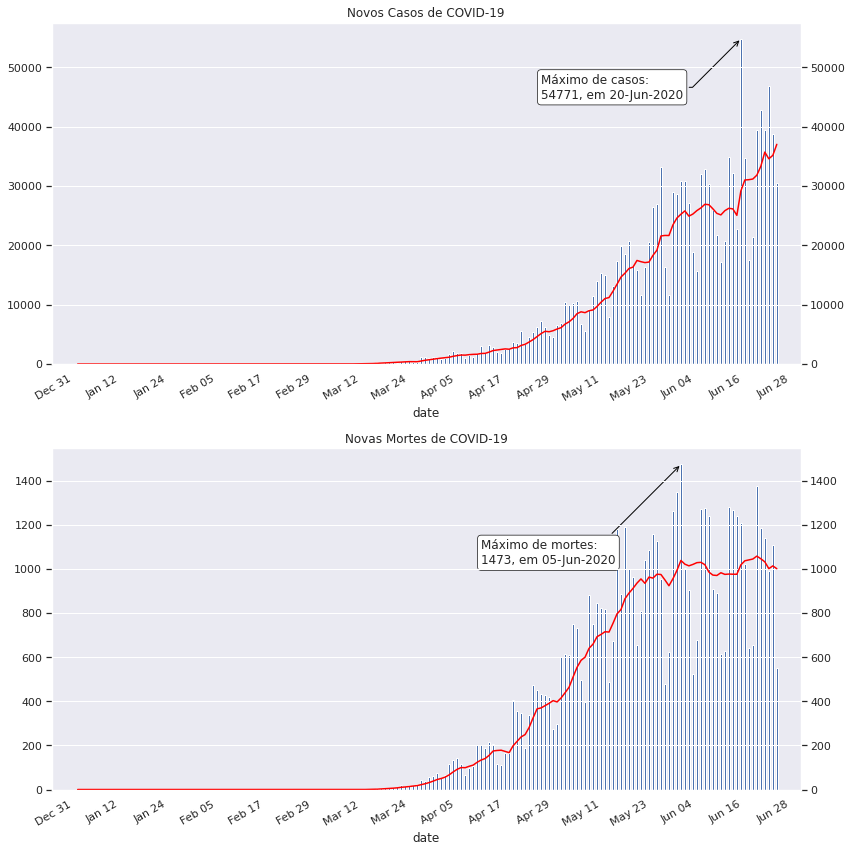

In [28]:
fig, ax = plt.subplots(nrows=2,figsize=(12,12))

tickerlabels = ['']*len(dfbr.date)
tickerlabels[::12] = [item.strftime('%b %d') for item in dfbr.date[::12]]

dfbr.plot(kind='bar', x="date", y='new_cases', ax=ax[0], title="Novos Casos de COVID-19", legend=False, grid=False)
dfbr.plot(kind='bar',x="date", y='new_deaths', ax=ax[1], title="Novas Mortes de COVID-19", legend=False, grid=False)
ax2 = ax[0].twinx()
ax2.plot(ax[0].get_xticks(), dfbr.moving_average_cases, color="red")
ax3=ax[1].twinx()
ax3.plot(ax[1].get_xticks(), dfbr.moving_average_deaths, color='red')
# Formatters
ax[0].xaxis.set_major_formatter(ticker.FixedFormatter(tickerlabels))
ax[1].xaxis.set_major_formatter(ticker.FixedFormatter(tickerlabels))

# Limites
ax[0].set_xlim(-0.5, len(dfbr.date) + 5)
ax[1].set_xlim(-0.5, len(dfbr.date) + 5)
ax2.set_ylim(0, ax[0].get_ylim()[1])
ax3.set_ylim(0, ax[1].get_ylim()[1])
# Ticklabels para o eixo x
ax[0].set_xticklabels(labels=tickerlabels, rotation=30)
ax[1].set_xticklabels(labels=tickerlabels, rotation=30)

# formatar gráfico 1
maxcases = dfbr.new_cases.max()
datemax = dfbr[dfbr.new_cases == maxcases].date.item()
datemin = dfbr.date.min()
xpos = mdates.date2num(datemax)-mdates.date2num(datemin)
ax[0].annotate('Máximo de casos:\n{:.0f}, em {:%d-%b-%Y}'.format(maxcases, datemax),
               xy=(xpos,maxcases), xycoords='data',
               xytext=(xpos-50, maxcases-10000), 
               arrowprops=dict(arrowstyle='->',
                            connectionstyle="angle,angleA=0,angleB=45",
                            color="black"),
               bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

# formatar gráfico 2
maxdeaths = dfbr.new_deaths.max()
datemax2 = dfbr[dfbr.new_deaths == maxdeaths].date.item()
xpos2 = mdates.date2num(datemax2)-mdates.date2num(datemin)
ax[1].annotate('Máximo de mortes:\n{:.0f}, em {:%d-%b-%Y}'.format(maxdeaths, datemax2),va='center',
               xy=(xpos2,maxdeaths), xycoords='data',
               xytext=(xpos2-50, maxdeaths-400), 
               arrowprops=dict(arrowstyle='->',
                            connectionstyle="angle,angleA=0,angleB=45",
                            color="black"),
               bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

plt.tight_layout()


Percebemos que a curva de novos casos ainda está em leve crescente, mesmo com um pico muito grande na data de 20 de junho. Quanto ao número de mortes registradas, vemos que não há tendência de queda notável; no máximo uma estabilização. Estas informações podem ser confirmadas no gráfico de média móvel de novos casos e novas mortes, calculados por 7 dias.

Contudo, percebe-se, até agora, que a curva de novos casos já parece não possuir a "segunda derivada" positiva; ou seja, a curva está em uma tendencia de estabilização para, depois, observarmos uma queda.

#### Panorama mundial

Aqui, o objetivo é analisarmos os dados de outras partes do mundo, e compará-los com o Brasil.

Inicialmente, vamos plotar o gráfico de casos de COVID-19 no mundo.

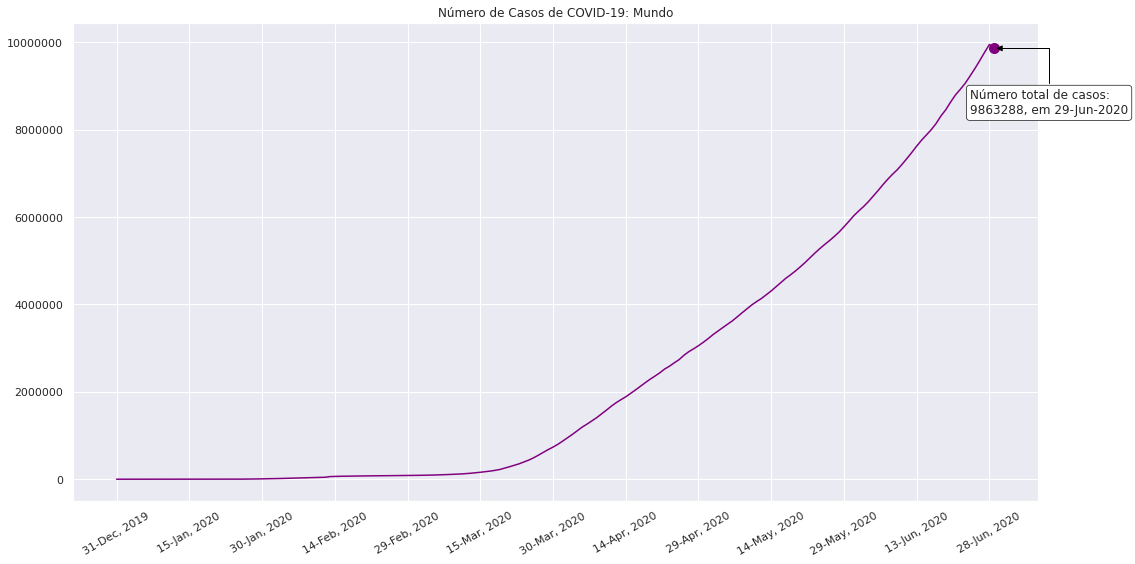

In [16]:
# gráfico de casos totais no mundo

#criar DataFrame agrupado por data
dfworld = df_anlys.groupby(by='date').sum()

# construindo a imagem de dados mundiais (somatório de todos os países)
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(dfworld.index, dfworld['total_cases'], marker="o", markevery=[-1], markersize=10, color="purple")
ax.set_title("Número de Casos de COVID-19: Mundo")

# Formatando o gráfico
ax.ticklabel_format(axis='y', style='plain')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b, %Y"))
plt.xticks(dfworld.index[0::15], rotation=30)

lastdate = dfworld.index[-1]
wcases = dfworld.loc[dfworld.index==lastdate]["total_cases"].item()
firstdate = dfworld.index[0]

ax.annotate('Número total de casos:\n{:.0f}, em {:%d-%b-%Y}'.format(wcases, lastdate),
               xy=(mdates.date2num(lastdate),wcases), xycoords='data',
               xytext=(mdates.date2num(lastdate)-5, wcases-1500000), textcoords='data',
            arrowprops=dict(arrowstyle='-|>', connectionstyle="angle,angleA=90,angleB=0",
                            color="black"),
               bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

fig.tight_layout()


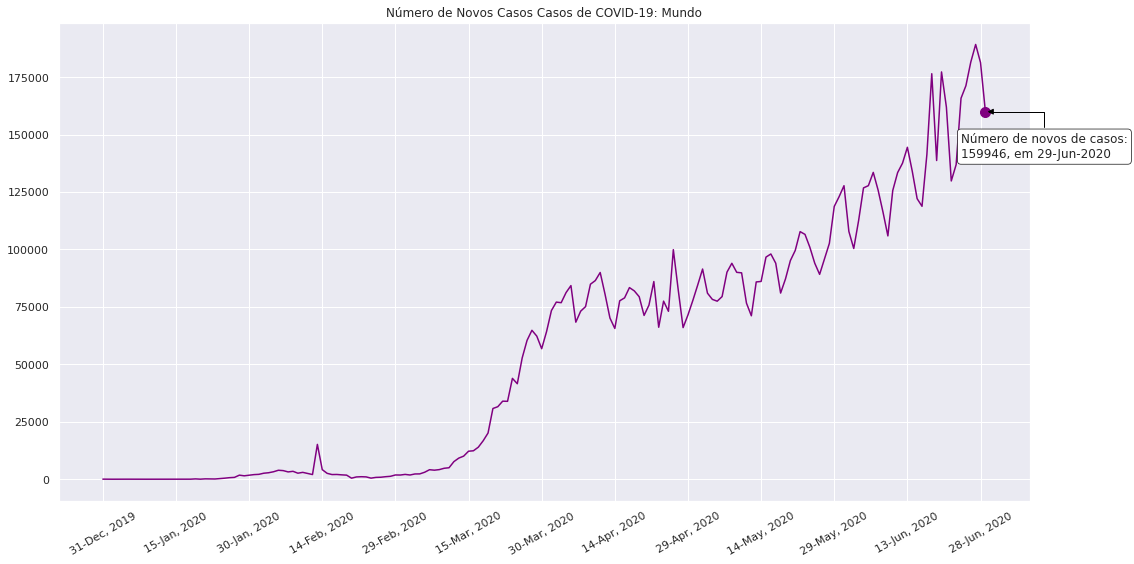

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(dfworld.index, dfworld['new_cases'], marker="o", markevery=[-1], markersize=10, color="purple")
ax.set_title("Número de Novos Casos Casos de COVID-19: Mundo")

# Formatando o gráfico
ax.ticklabel_format(axis='y', style='plain')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b, %Y"))
plt.xticks(dfworld.index[0::15], rotation=30)

lastdate = dfworld.index[-1]
wcases = dfworld.loc[dfworld.index==lastdate]["new_cases"].item()
firstdate = dfworld.index[0]

ax.annotate('Número de novos de casos:\n{:.0f}, em {:%d-%b-%Y}'.format(wcases, lastdate),
               xy=(mdates.date2num(lastdate),wcases), xycoords='data',
               xytext=(mdates.date2num(lastdate)-5, wcases-20000), textcoords='data',
            arrowprops=dict(arrowstyle='-|>', connectionstyle="angle,angleA=90,angleB=0",
                            color="black"),
               bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

fig.tight_layout()

Percebemos um grande crescimento partindo em meados de março. Houve um primeiro topo em junho, com uma diminuição nos dias seguintes.

Agora, vamos olhar para locais específicos: vamos identificar quais são os 7 países que possuem a maior quantidade de casos registrados e de mortes registradas por decorrência de COVID-19.

In [18]:
# ordenando por maior número de casos no total, valores absolutos, os 7 primeiros países:
df_anlys.loc[df_anlys.date==df_anlys.date.max()].sort_values(by='total_cases', ascending=False)[0:7]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population
25657,USA,North America,United States,2020-06-29,2548996.0,38673.0,125804.0,265.0,7700.833,116.836,380.069,0.801,3.310026e+08
3656,BRA,South America,Brazil,2020-06-29,1344143.0,30476.0,57622.0,552.0,6323.611,143.376,271.087,2.597,2.125594e+08
20359,RUS,Europe,Russia,2020-06-29,634437.0,6791.0,9073.0,104.0,4347.410,46.535,62.172,0.713,1.459345e+08
11393,IND,Asia,India,2020-06-29,548318.0,19459.0,16475.0,380.0,397.331,14.101,11.938,0.275,1.380004e+09
25475,GBR,Europe,United Kingdom,2020-06-29,311151.0,901.0,43550.0,36.0,4583.434,13.272,641.517,0.530,6.788600e+07
19309,PER,South America,Peru,2020-06-29,279419.0,3430.0,9317.0,182.0,8474.472,104.028,282.574,5.520,3.297185e+07
5165,CHL,South America,Chile,2020-06-29,271982.0,4216.0,5509.0,162.0,14227.821,220.546,288.185,8.474,1.911621e+07


In [19]:
# ordenando por maior número de mortes no total, valores absolutos, os 7 primeiros países:
df_anlys.loc[df_anlys.date==df_anlys.date.max()].sort_values(by='total_deaths', ascending=False)[0:7]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population
25657,USA,North America,United States,2020-06-29,2548996.0,38673.0,125804.0,265.0,7700.833,116.836,380.069,0.801,3.310026e+08
3656,BRA,South America,Brazil,2020-06-29,1344143.0,30476.0,57622.0,552.0,6323.611,143.376,271.087,2.597,2.125594e+08
25475,GBR,Europe,United Kingdom,2020-06-29,311151.0,901.0,43550.0,36.0,4583.434,13.272,641.517,0.530,6.788600e+07
12576,ITA,Europe,Italy,2020-06-29,240310.0,174.0,34738.0,22.0,3974.574,2.878,574.544,0.364,6.046183e+07
8806,FRA,Europe,France,2020-06-29,162936.0,0.0,29778.0,0.0,2496.204,0.000,456.203,0.000,6.527351e+07
16062,MEX,North America,Mexico,2020-06-29,216852.0,4050.0,26648.0,267.0,1681.900,31.412,206.681,2.071,1.289328e+08
11393,IND,Asia,India,2020-06-29,548318.0,19459.0,16475.0,380.0,397.331,14.101,11.938,0.275,1.380004e+09


Vemos que o Brasil está em segundo lugar, tanto em número de casos como em número de mortes, perdendo apenas para os EUA. Também vemos que a Rússia possui a terceira colocação em número de casos, mas está fora do top-7 em relação às mortes. Por fim, também percebemos que outros países da América do Sul estão presentes no total de casos: Chile e Peru.

Para facilitar a visualização, abaixo crio gráficos de colunas verticais para os países:

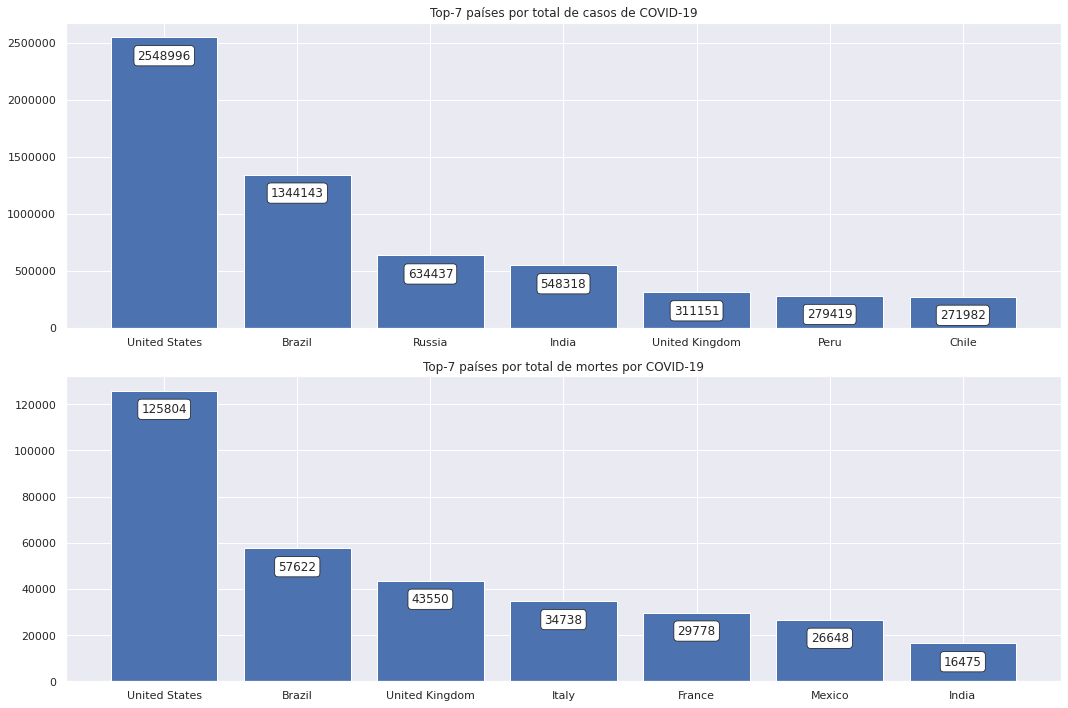

In [20]:
top7_total_cases = df_anlys.loc[df_anlys.date==df_anlys.date.max(), ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:7]
top7_total_deaths = df_anlys.loc[df_anlys.date==df_anlys.date.max(), ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:7]

fig, ax = plt.subplots(nrows=2, figsize=(15,10))


# Construindo gráfico de total de casos
ax[0].bar('location', 'total_cases', data=top7_total_cases)
ax[0].ticklabel_format(axis='y', style='plain')
ax[0].set_title("Top-7 países por total de casos de COVID-19")
  # Formatando Rótulos
countries = top7_total_cases['location'].tolist()
for country in countries:
        ax[0].annotate(f"{top7_total_cases[top7_total_cases.location == country]['total_cases'].item():.0f}",
                    xy=(countries.index(country),top7_total_cases[top7_total_cases.location == country]['total_cases'].item()),
                    xytext=(0, -25),  
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

# Formatando gráfico de mortes
ax[1].bar('location', 'total_deaths', data=top7_total_deaths)
ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title("Top-7 países por total de mortes por COVID-19")
# Formatando Rótulos
countries2 = top7_total_deaths['location'].tolist()
for country in countries2:
        ax[1].annotate(f"{top7_total_deaths[top7_total_deaths.location == country]['total_deaths'].item():.0f}",
                    xy=(countries2.index(country),top7_total_deaths[top7_total_deaths.location == country]['total_deaths'].item()),
                    xytext=(0, -25),  
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))


plt.tight_layout()
plt.show()

Contudo, grande parte das pessoas pensa que estes dados devem ser considerados desta maneira, e grande parte dos veículos de mídia brasileiros alardeiam sobre uma gestão ineficiente do combate à doença.

Contudo, como em todo dado absoluto envolvendo um país, há uma distorção causada pelo tamanho da popoulação dentro da estatísitca. Um exemplo disso é o PIB de um país: embora o PIB do Brasil seja o 9º maior do mundo, em PIB *per capita* ele ocupa apenas a 82ª posição. Desta forma, **distorções envolvendo a população de cada país devem ser consideradas para se tormar uma consulão assertiva**.

Para isso, vamos olhar os gráficos com os mesmos países, mas considerando o número de ocorrências por milhão de habitantes (expressos nas colunas `total total_cases_per_million`e `total_deaths_per_million`).

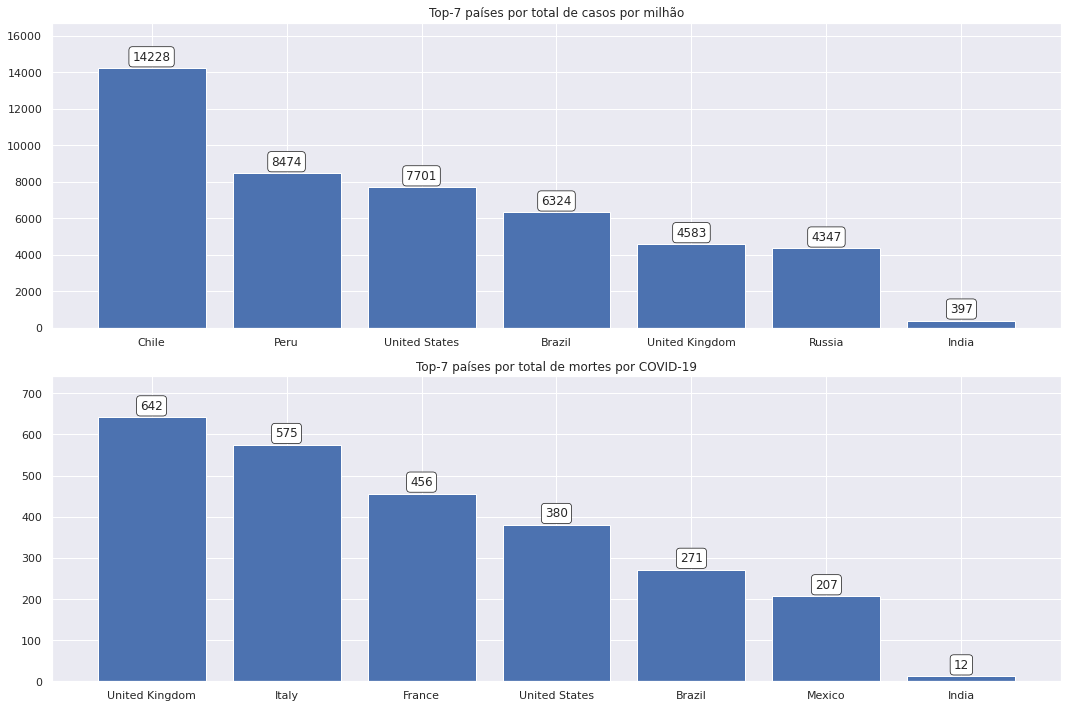

In [21]:
top7_cases_pop = df_anlys.loc[df_anlys.date==df_anlys.date.max(),
                              ['location', 'total_cases', 'total_cases_per_million']].sort_values(by="total_cases", ascending=False)[0:7]
top7_deaths_pop = df_anlys.loc[df_anlys.date==df_anlys.date.max(),
                               ['location', 'total_deaths', 'total_deaths_per_million']].sort_values(by="total_deaths", ascending=False)[0:7]

top7_cases_pop_sort = top7_cases_pop.sort_values(by="total_cases_per_million", ascending=False)
top7_deaths_pop_sort = top7_deaths_pop.sort_values('total_deaths_per_million', ascending=False)

fig, ax = plt.subplots(nrows=2, figsize=(15,10))


# Construindo gráfico de total de casos
ax[0].bar('location', 'total_cases_per_million', data=top7_cases_pop_sort)
ax[0].ticklabel_format(axis='y', style='plain')
ax[0].set_title("Top-7 países por total de casos por milhão")
ax[0].set_ylim(0, top7_cases_pop_sort['total_cases_per_million'].max()+2500)
  # Formatando Rótulos
countries3 = top7_cases_pop_sort['location'].tolist()
for country in countries3:
        ax[0].annotate(f"{top7_cases_pop_sort[top7_cases_pop_sort.location == country]['total_cases_per_million'].item():.0f}",
                    xy=(countries3.index(country),top7_cases_pop_sort[top7_cases_pop_sort.location == country]['total_cases_per_million'].item()),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

# Formatando gráfico de mortes
ax[1].bar('location', 'total_deaths_per_million', data=top7_deaths_pop_sort)
ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title("Top-7 países por total de mortes por COVID-19")
ax[1].set_ylim(0, top7_deaths_pop_sort['total_deaths_per_million'].max()+100)
# Formatando Rótulos
countries4 = top7_deaths_pop_sort['location'].tolist()
for country in countries4:
        ax[1].annotate(f"{top7_deaths_pop_sort[top7_deaths_pop_sort.location == country]['total_deaths_per_million'].item():.0f}",
                    xy=(countries4.index(country),top7_deaths_pop[top7_deaths_pop_sort.location == country]['total_deaths_per_million'].item()),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va="bottom",
                    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))


plt.tight_layout()
plt.show()

**Lembro que os gráficos acima são dos países que possuem maior número ABSOLUTO de casos e de mortes, para mostrar a distorção que o número de habitantes causa.**

Percebemos que o Brasil está melhor, em número de mortes por milhão, do que todos os países europeus, o que mostra o erro em afirmar que a situação do país é pior por ter maior número absoluto.

Também, percebemos que o Brasil também está longe de ser o país com o maior número de casos, estando abaixo de Chile e Peru na nossa lista.

Vemos finalmente um grande problema na América do Sul em relação a número de casos, uma vez que temos 3 dos 7 países listados; desta forma, vamos listar os valores para este continente (coluna `continent`).

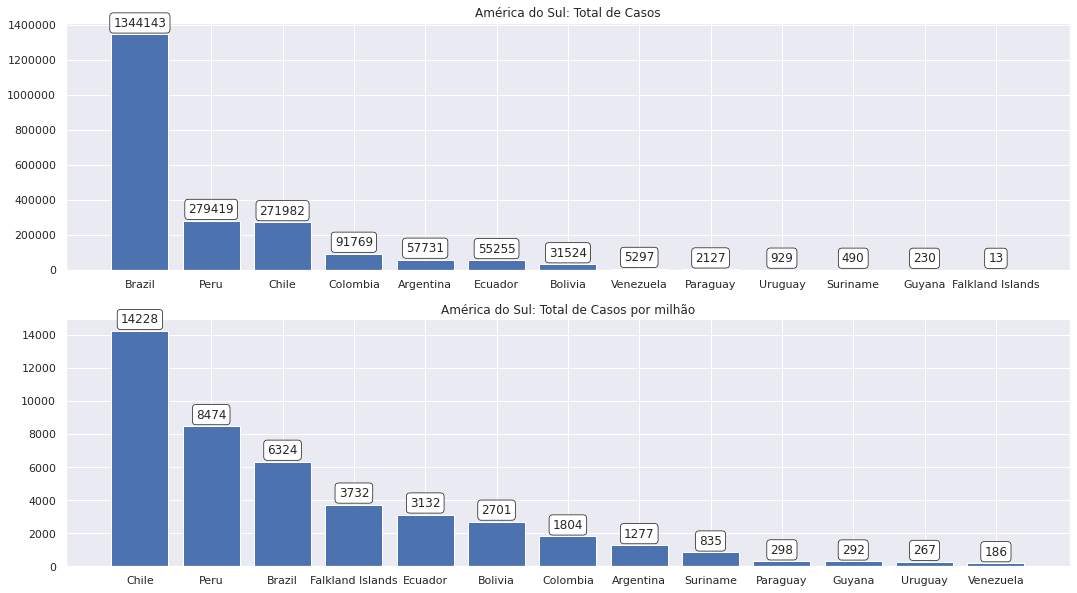

In [22]:
dfcontinent = df_anlys[df_anlys.continent=="South America"].copy()

# Selecionando os países
samerica = dfcontinent.loc[df_anlys.date==df_anlys.date.max(),
                           ['location','total_cases', 'total_cases_per_million',
                            'total_deaths', 'total_deaths_per_million']]
samerica2 = samerica.sort_values('total_cases', ascending=False)
sacountries = samerica2['location'].tolist()

# Plotando o gráfico de números absolutos
fig, ax = plt.subplots(nrows=2, figsize=(18,10))

ax[0].bar('location', 'total_cases', data=samerica2)
ax[0].ticklabel_format(axis='y', style='plain')
ax[0].set_title("América do Sul: Total de Casos")
# Formatando Rótulos

for country in sacountries:
        ax[0].annotate(f"{samerica2[samerica2.location == country]['total_cases'].item():.0f}",
                    xy=(sacountries.index(country),samerica2[samerica2.location == country]['total_cases'].item()),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

samerica3 = samerica.sort_values('total_cases_per_million', ascending=False)
sacountries2 = samerica3['location'].tolist()

ax[1].bar('location', 'total_cases_per_million', data=samerica3)
ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title("América do Sul: Total de Casos por milhão")
# Formatando Rótulos

for country in sacountries2:
        ax[1].annotate(f"{samerica3[samerica3.location == country]['total_cases_per_million'].item():.0f}",
                    xy=(sacountries2.index(country),samerica3[samerica3.location == country]['total_cases_per_million'].item()),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

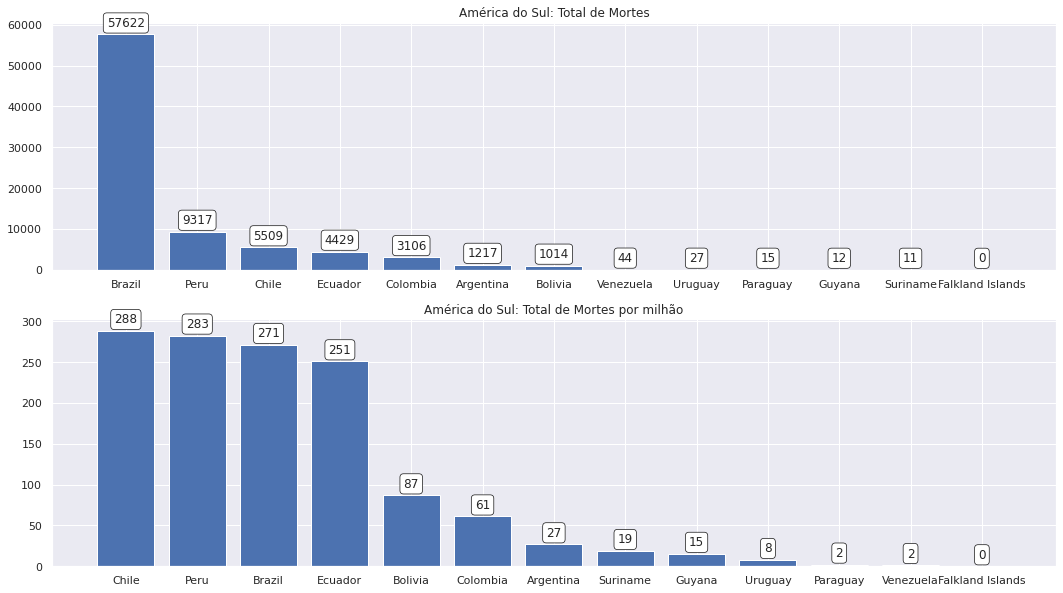

In [23]:
samerica4 = samerica.sort_values('total_deaths', ascending=False)
sacountries3 = samerica4['location'].tolist()

# Plotando o gráfico de números absolutos
fig, ax = plt.subplots(nrows=2, figsize=(18,10))

ax[0].bar('location', 'total_deaths', data=samerica4)
ax[0].ticklabel_format(axis='y', style='plain')
ax[0].set_title("América do Sul: Total de Mortes")
# Formatando Rótulos

for country in sacountries3:
        ax[0].annotate(f"{samerica4[samerica4.location == country]['total_deaths'].item():.0f}",
                    xy=(sacountries3.index(country),samerica4[samerica4.location == country]['total_deaths'].item()),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

samerica5 = samerica.sort_values('total_deaths_per_million', ascending=False)
sacountries4 = samerica5['location'].tolist()

ax[1].bar('location', 'total_deaths_per_million', data=samerica5)
ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title("América do Sul: Total de Mortes por milhão")
# Formatando Rótulos

for country in sacountries4:
        ax[1].annotate(f"{samerica5[samerica5.location == country]['total_deaths_per_million'].item():.0f}",
                    xy=(sacountries4.index(country),samerica5[samerica5.location == country]['total_deaths_per_million'].item()),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))

Percebemos que a distorção do valor de orcorrências por milhão pode ocorrer em países cuja população é muito pequena (como é o caso das Ilhas Falkland).

O Brasil está disparado em números absolutos de casos e de mortes, uma vez que a população brasileira é disparadamente a maior do continente. Em números relativos, no entanto, vemos uma situação muito parecida com Chile e Peru, os outros dois países vizinhos mais afetados pela doença, além do Equador, que não estava nem na lista de números absolutos.

Isto mostra o quão equivocada pode ser uma conclusão sobre um país que não considera o tamanho de sua população.

## Conclusão

Concluímos que a situação da pandemia no Brasil ainda não está sanada: ainda não há tendências de visualização de baixas nas curvas de casos e de mortes no país.

Também concluímos que, embora o país seja o 2º colocado em números absolutos, em números relativos a situação do Brasil está parecida com outros países da América Latina (Chile, Peru e Equador), e levemente melhor que outros países europeus (como Grã-bretanha, França e Itália) e do que os EUA. Isto é devido ao **tamanho da população brasileira, que distorce as conclusões feitas com números absolutos**, e é importantíssimo considerá-la para uma interpretação correta.

Em um mundo onde a informação está na plama da mão, é importante saber interpretá-la para evitar cair em narrativas e viéses. Isto é um exemplo do porquê *Data Science* se torna cada vez mais importante nas tomadas de decisão e no universo corporativo como um todo. 